<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2003/%E8%B3%87%E6%96%99%E5%8F%96%E5%BE%97%E8%88%87%E5%84%B2%E5%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#資料取得與儲存

---

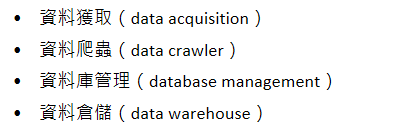

資料的取得是指從「從網路上取得資料到本地」的過程


1. 用戶端（Client）發起一個請求（Request）
2. 向伺服器/資料端（Server）索取想要的資料
3. 接著伺服器會回傳對應資料的回應（Response）

像這樣基於 Request 與 Response 的交換機制，是來自於 HTTP（HyperText Transfer Protocol）的規範。常見的資料來源可以分成三種來源
1. 檔案下載
2. API串接
3. 網頁爬蟲
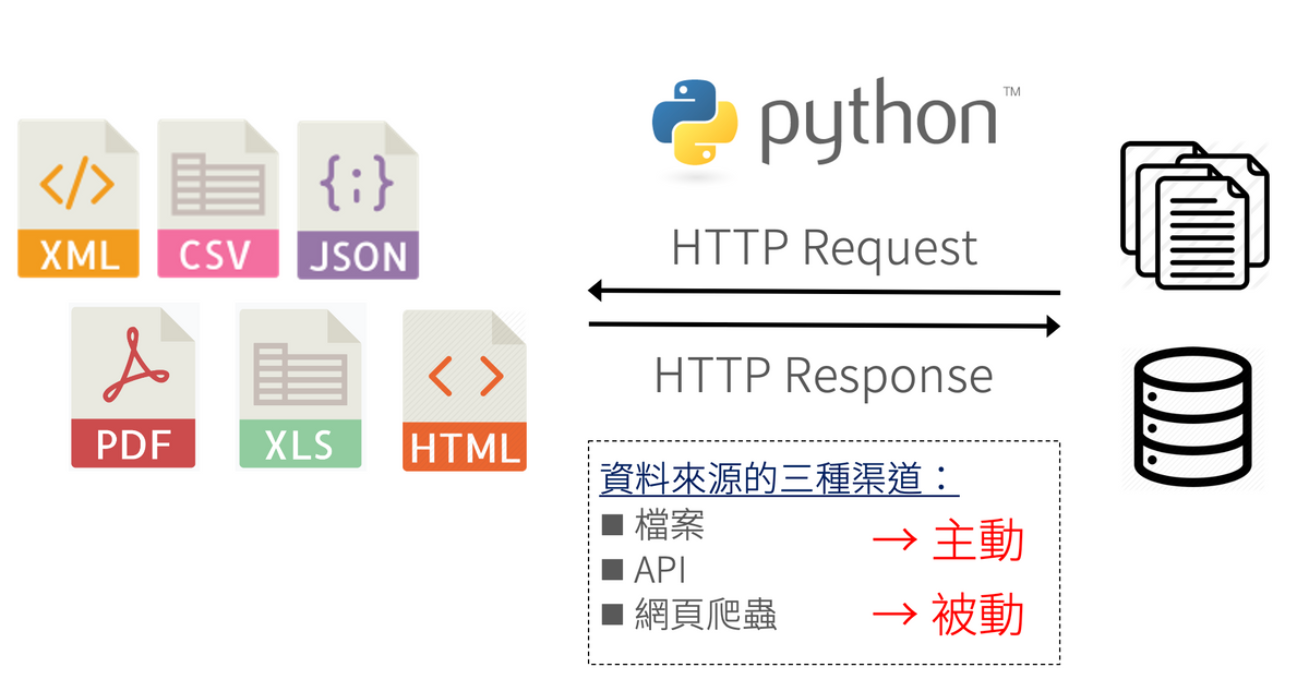

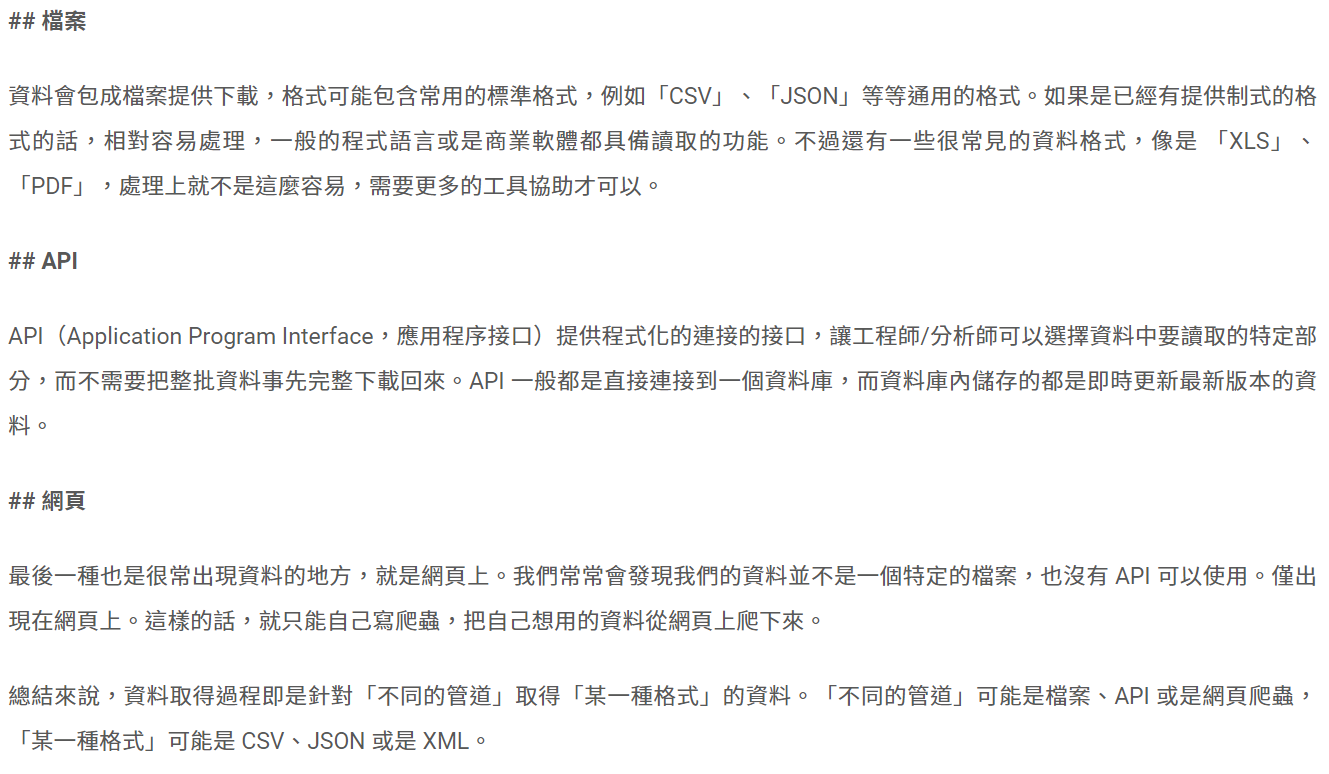

#資料儲存與資料庫系統


---
資料從網路上取得到本地端之後，通常有兩種儲存的方式
1. 直接存放
2. 資料庫管理

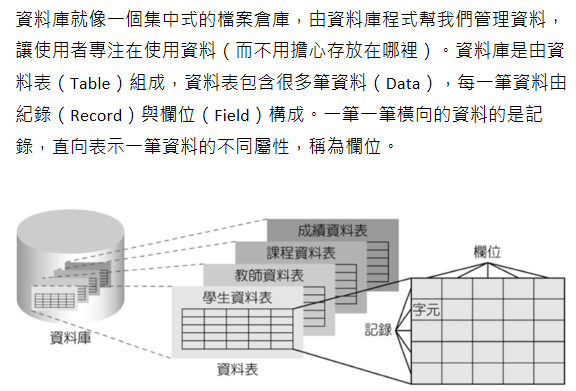

# 靜態網頁爬蟲實作

---

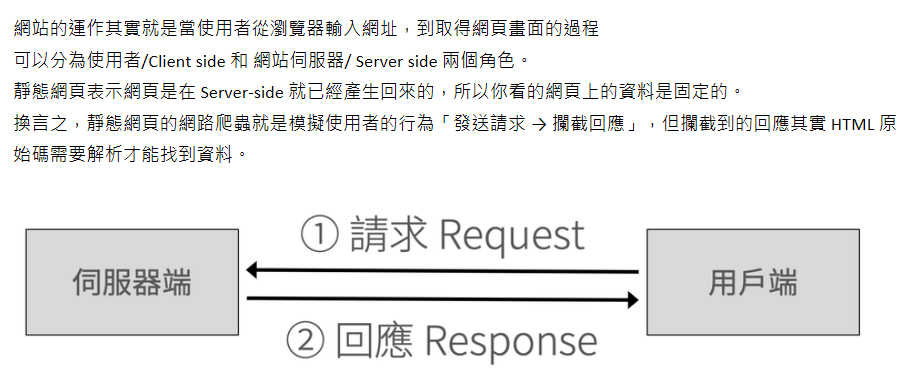


我們可以利用 requests 這個套件來模擬使用者「發送請求 → 接收回應」的行為：
```
import requests

url = '網址'
r = requests.get(url)
response = r.text
```
只是這邊取回來的資料其實是一個「長得很像 HTML 原始碼的字串」，必須經過處理後才可以拿到資料。


```
from bs4 import BeautifulSoup
d = BeautifulSoup(r.text, 'html5lib')
print(d)
```




## HTML結構
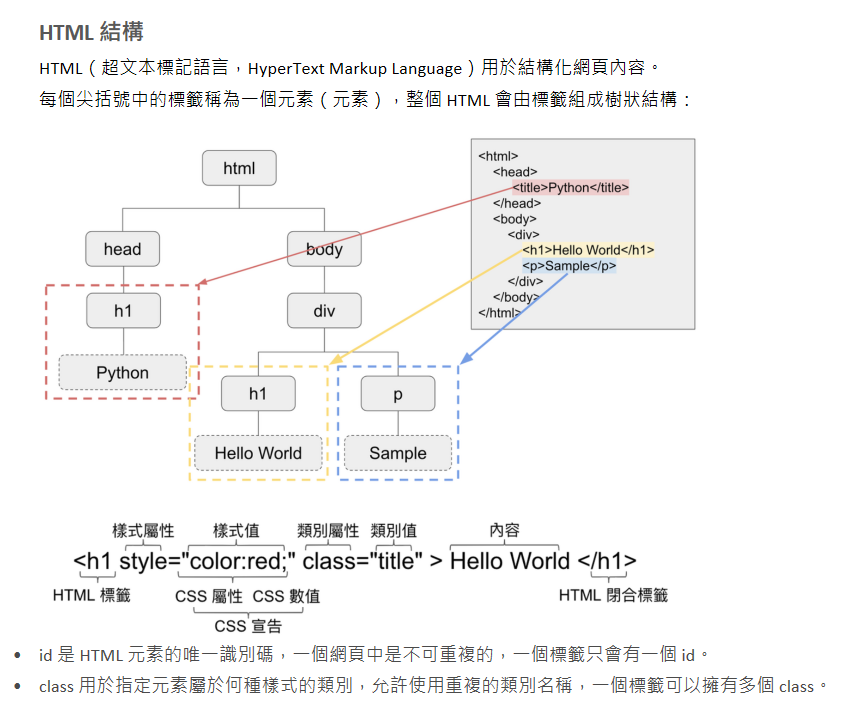



```
# 利用 id & class 限縮條件

story = soup.find('a', class_="story")
# 找出第一個 class=story 的 a 標籤

titles = soup.find_all("p", class_="title")
# 找出所有的 class=title 的 p 標籤
```



# 資料庫資料儲存

## 利用 Python 操作 SQLite 資料庫

---

在 Python 程式碼中，我們可以使用 SQLite3 模組中的 connect() 函數來建立 SQLite 資料庫：

```
import sqlite3


# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')
```



## 在 SQLite 資料庫中準備模擬資料

---
我們先使用 Python 內建的 sqlite3 函式庫，建立一個 SQLite 資料庫與模擬資料：

程式碼會建立一個名為 test.db 的 SQLite 資料庫，並建立一個名為 students 的資料表，插入一些資料。

```
import sqlite3

# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')

# 建立一個名為 students 的資料表
conn.execute('''CREATE TABLE students
             (ID INT PRIMARY KEY NOT NULL,
             NAME TEXT NOT NULL,
             AGE INT NOT NULL,
             GRADE INT NOT NULL);''')

# 插入一些資料
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (1, 'John', 20, 85)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (2, 'Mary', 21, 90)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (3, 'Tom', 19, 78)")
conn.execute("INSERT INTO students (ID, NAME, AGE, GRADE) \
              VALUES (4, 'Lily', 22, 95)")

# 提交更改
conn.commit()

# 關閉資料庫連線
conn.close()
```




## 利用 Pandas 操作 SQLite 資料庫

---
Pandas 是一個 Python 的資料分析函式庫，它可以讓使用者更輕鬆地處理資料。接下來我們將學習如何使用 Pandas DataFrame 直接操作 SQLite 資料庫。


### 讀取資料庫資料

```
import pandas as pd
import sqlite3

# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')

# 讀取資料表資料
df = pd.read_sql_query("SELECT * from students", conn)

# 關閉資料庫連線
conn.close()

# 顯示 DataFrame
print(df)
```





### 寫入資料庫


```
# 建立 SQLite 資料庫連線
conn = sqlite3.connect('test.db')

# 將 DataFrame 的資料寫入資料庫
df.to_sql('students_new', conn, if_exists='replace', index=False)

# 關閉資料庫連線
conn.close()
```



# bakeUp - 物件定位
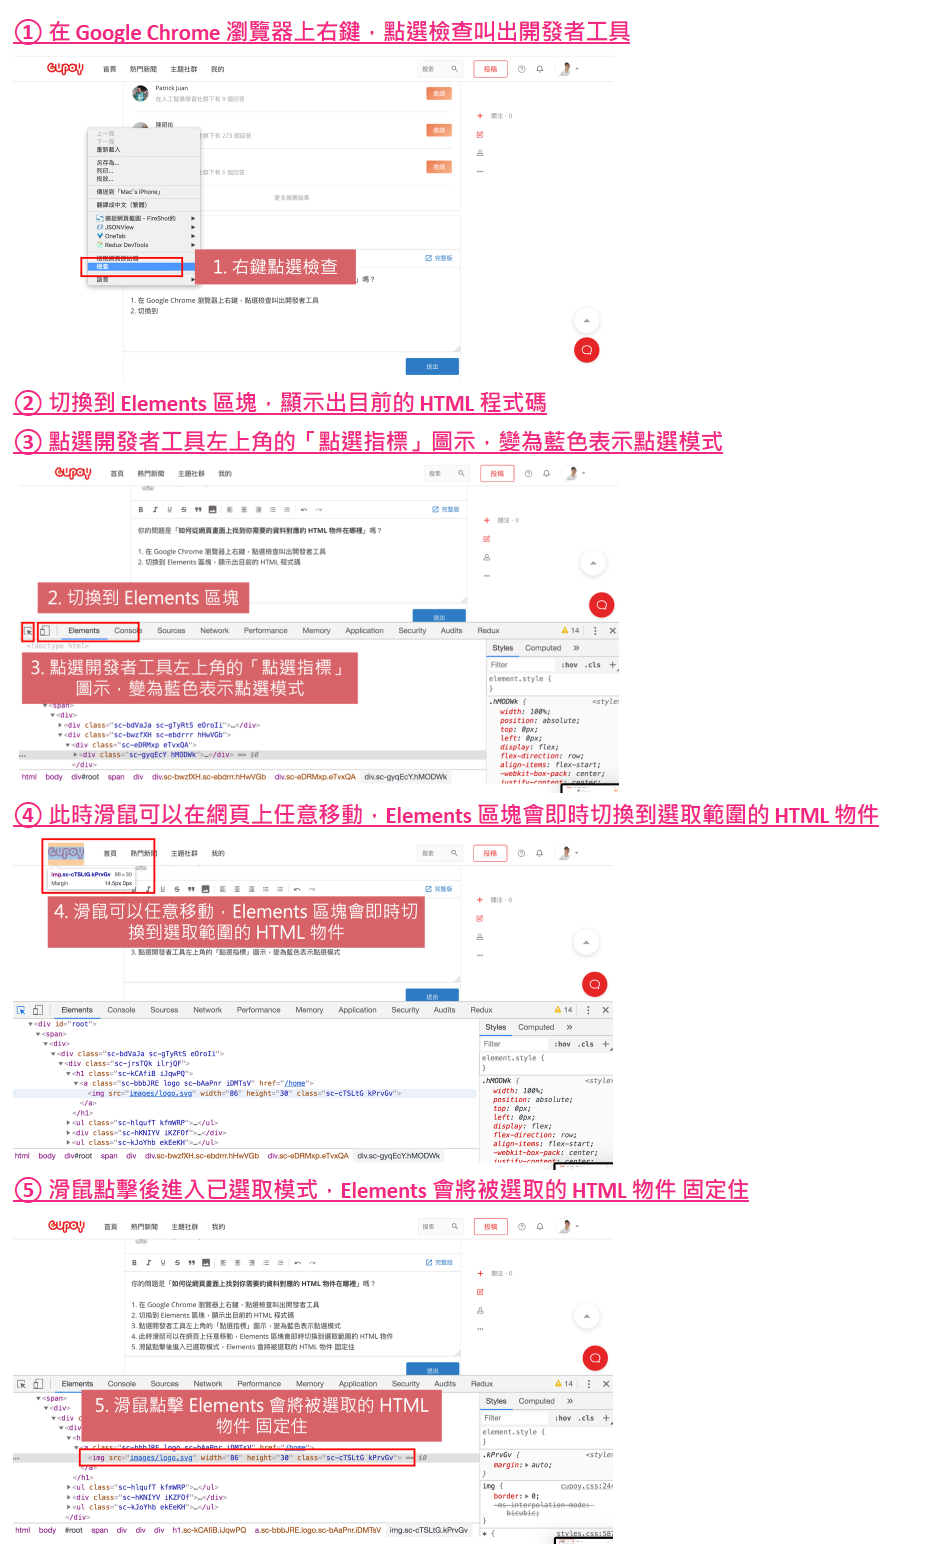